In [1]:
import numpy as np
import pandas as pd
from edempy import Deck
from extrapolation import extrapolation
from LaceyClass import LaceyMixingAnalyzer
import matplotlib.pyplot as plt
from rnn.data_loader_rnn import RNNLoader
from rnn.rnn_extrap import plot_particles, import_dict
import os


sim_names = ["Rot_drum_mono", "Rot_drum_binary_mixed", "Rot_drum_400k"]
sim_name = sim_names[-1]
sim_path =rf"V:\GrNN_EDEM-Sims\{sim_name}.dem"

In [2]:
lacey_settings = f"{sim_path[:-4]}_data\Export_Data\Lacey_settings.txt"

with open(lacey_settings, 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = int(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

lacey = LaceyMixingAnalyzer(minCoords, maxCoords, bins)
rnn = RNNLoader(1,20,sim_path)


In [3]:
delta_t = 0.05
extrapolated_lacey = []
extrapolated_time = []
id_dict_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data"
id_dict = import_dict(id_dict_path, "id_dict")
plots_path = rf"{sim_path[:-4]}_data\Export_Data\extrap_algo_plots"

# b_coords_lacey, div_size_lacey = lacey.grid()
# for timestep in np.arange(rnn.start_t, rnn.end_t+delta_t, delta_t):
#     timestep_i = rnn.find_nearest(timestep, rnn.deck.timestepValues)
#     particles = rnn.get_particle_data(timestep_i)
#     particles = np.delete(particles, [3,4,5], 1)

#     plot_filename = rf"{plots_path}\{timestep:.2f}.png"
#     pred_t_mass = plot_particles(particles, id_dict, True, timestep, plot_path=plot_filename)
#     mass_1, mass_2, conc = lacey.bining(b_coords_lacey, div_size_lacey, pred_t_mass, cut_off)
#     Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(pred_t_mass))
#     print(f"{timestep}: {Lacey_index}")
#     extrapolated_lacey.append(Lacey_index)
#     extrapolated_time.append(timestep)

#np.savetxt(rf"{plots_path}\_lacey.csv", np.column_stack((extrapolated_time, extrapolated_lacey)), delimiter=",")
    

V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\35_12_35_10_plots\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\35_12_35_10_plots_new\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\dem_sim_plots\actual_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\extrap_algo_plots\10y_3_3.7\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\extrap_algo_plots\8y_3_4.6\_lacey.csv


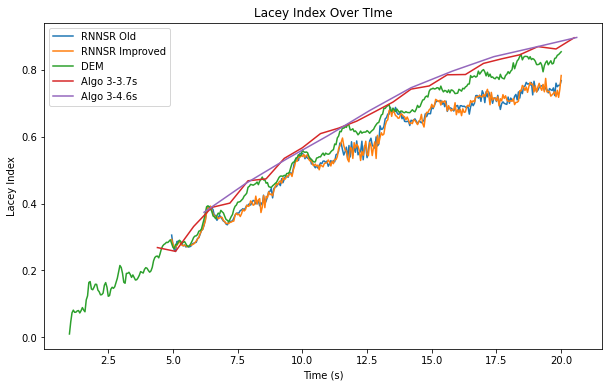

In [52]:
# Specify the folder path where your CSV files are located
folder_path = id_dict_path

# Initialize an empty list to store numpy arrays from each file
data_arrays = []

# Function to read CSV file and return a numpy array
def read_csv_to_numpy(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Iterate through all files in the folder and its subfolders
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith('_lacey.csv'):
            file_path = os.path.join(root, filename)
            print(file_path)
            
            # Read the CSV file and append the numpy array to data_arra'ArithmeticErrorys
            data_arrays.append(read_csv_to_numpy(file_path))

# Plot the data from all files
plt.figure(figsize=(10, 6))

for i, data_array in enumerate(data_arrays):
    plt.plot(data_array[:, 0], data_array[:, 1], label=["RNNSR Old", "RNNSR Improved", "DEM", "Algo 3-3.7s", "Algo 3-4.6s"][i])


plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Lacey Index')
plt.title('Lacey Index Over TIme')
plt.legend()
plt.show()


In [18]:
len(data_arrays)

5

In [4]:
## Extrapolation algo

#simulation parameters
start_t = 1
end_t = 20
domain_x = (-0.07, 0.07)       
domain_y = (-0.025, 0.025)
domain_z = (-0.07, 0.07)
num_bins = 10
direction = "y"

extrap = extrapolation(start_t, end_t, sim_path, domain_x, domain_y, domain_z, num_bins, direction)

In [78]:
kinetic_energies, peak_times, peak_index, highlight_y = extrap.kin_energies(0.0002, 5)

Analysing Kinetic Energies...


(0.0, 10.0)

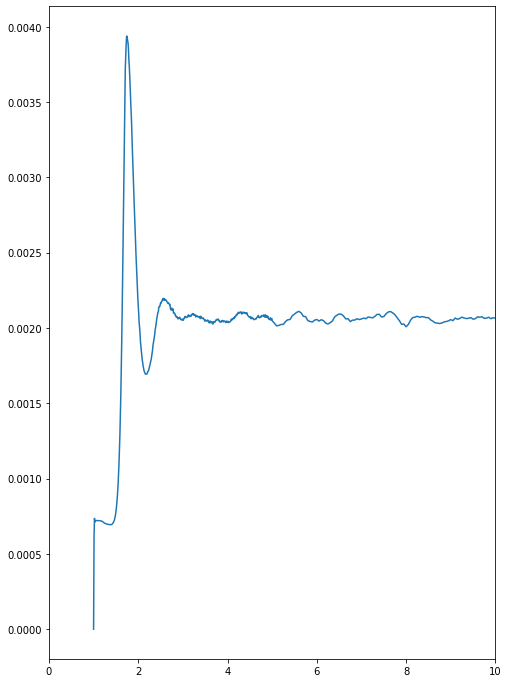

In [79]:
plt.figure(figsize=(8,12))
kin_e = np.column_stack((extrap.deck.timestepValues[extrap.start:], kinetic_energies))
plt.plot(kin_e[:,0], -kin_e[:,1])

plt.scatter(peak_times, highlight_y, c="red")
x = (0,10)


plt.xlim(left=x[0], right=x[1])

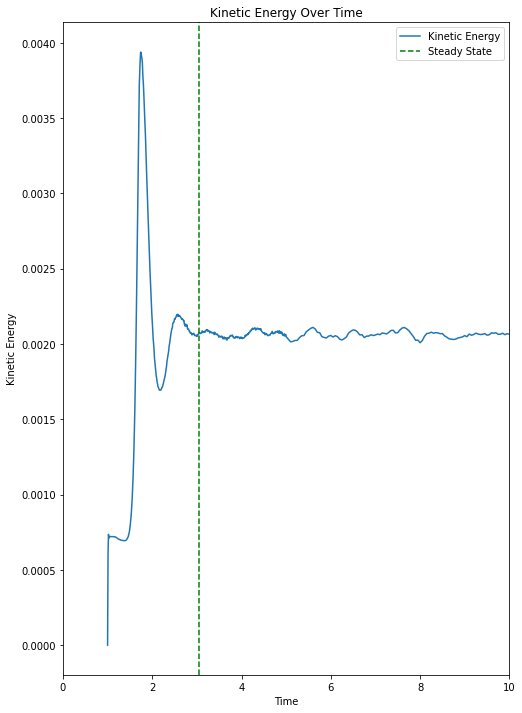

3.0500009253102642


In [126]:
threshold = 0.000005  # Adjust the threshold based on your specific case
downsample_kin = kin_e[201:403:5, :]
kinetic_energies = np.vstack((downsample_kin, kin_e[403:]))

# Find the index where the kinetic energies stabilize
kin_diff = np.abs(np.diff(kinetic_energies[:, 1]))

steady_state_index = np.argmax(kin_diff < threshold)

# print(kinetic_energies)
# print(kin_diff)
# print(steady_state_index)
# print(kin_diff[steady_state_index])
# plt.figure(dpi=100)
# plt.plot(kinetic_energies[1:, 0], kin_diff)
# print(kin_diff[steady_state_index]>threshold)


# Plotting
plt.figure(figsize=(8, 12))
plt.plot(kin_e[:, 0], -kin_e[:, 1], label='Kinetic Energy')

# Plot vertical line at steady state
plt.axvline(x=kinetic_energies[steady_state_index, 0], color='green', linestyle='--', label='Steady State')

# Set x-axis limits
x_limits = (0, 10)
plt.xlim(left=x_limits[0], right=x_limits[1])

# Add labels, title, legend, etc.
plt.xlabel('Time')
plt.ylabel('Kinetic Energy')
plt.title('Kinetic Energy Over Time')
plt.legend()
plt.show()

print(kinetic_energies[steady_state_index, 0])

Text(0.5, 0, 'Time')

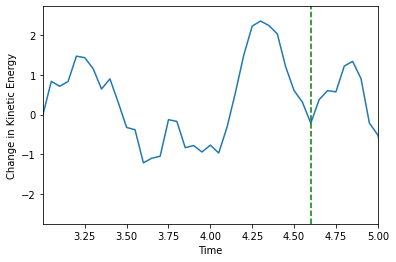

In [147]:
change_in_ke = np.column_stack((kinetic_energies[:,0], (kinetic_energies[:, 1]/kinetic_energies[0,1]-1)*100))

plt.figure()

plt.plot(change_in_ke[:, 0], change_in_ke[:, 1], label='Kinetic Energy')

x_limits = (change_in_ke[0,0], 5)
plt.xlim(left=x_limits[0], right=x_limits[1])

plt.axvline(x=4.6, color='green', linestyle='--', label='Steady State')
plt.ylabel("Change in Kinetic Energy")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

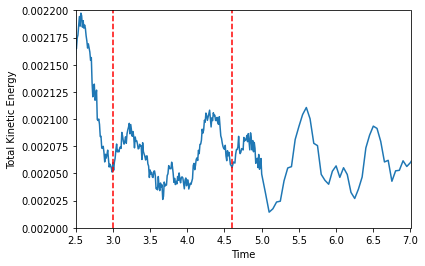

In [148]:
#plt.figure(figsize=(8,12), dpi=100)
plt.plot(kin_e[:,0], -kin_e[:,1])

plt.scatter(peak_times, highlight_y, c="red")
x = (2.5,7)

plt.xlim(left=x[0], right=x[1])
plt.ylim(0.002, 0.0022)
plt.axvline(x=3, color='red', linestyle='--')
plt.axvline(x=4.6, color='red', linestyle='--')

plt.ylabel("Total Kinetic Energy")
plt.xlabel("Time")


In [48]:
t1 = 3
t2 = 4.6

t1_index = extrap.find_nearest(extrap.deck.timestepValues, t1)
t2_index = extrap.find_nearest(extrap.deck.timestepValues, t2)
print(t1_index, t2_index)

t1_data = extrap.get_particle_coords(t1_index)
t2_data = extrap.get_particle_coords(t2_index)


301 461


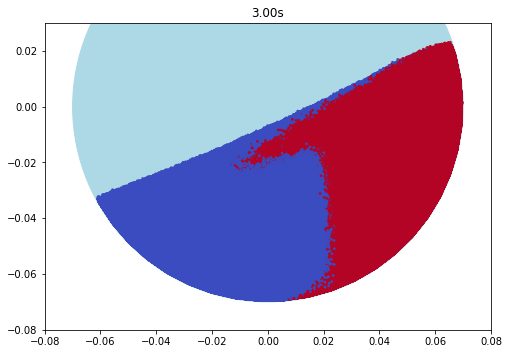

<Figure size 432x288 with 0 Axes>

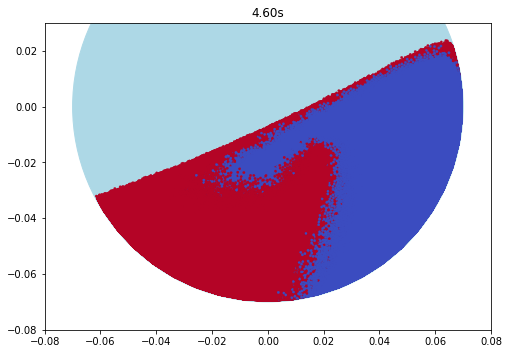

array([[ 3.57068408e-02, -2.45143828e-02, -3.16776887e-02,
         1.30899694e-06,  3.81124000e+05,  0.00000000e+00],
       [ 1.43491184e-02, -2.45128570e-02, -4.37029259e-02,
         1.30899694e-06,  2.82910000e+04,  1.00000000e+00],
       [ 3.85375709e-02, -2.45120574e-02, -3.05620769e-02,
         1.30899694e-06,  2.48659000e+05,  0.00000000e+00],
       ...,
       [ 8.03762844e-03,  2.45122282e-02, -5.92718382e-02,
         1.30899694e-06,  3.76235000e+05,  1.00000000e+00],
       [ 2.01750559e-02,  2.45122325e-02, -3.56513964e-02,
         1.30899694e-06,  2.65000000e+02,  0.00000000e+00],
       [ 1.77128132e-02,  2.45124970e-02, -3.13690300e-02,
         1.30899694e-06,  1.77325000e+05,  1.00000000e+00]])

<Figure size 432x288 with 0 Axes>

In [6]:
id_dict = import_dict(id_dict_path, "id_dict")

plot_filename = rf"{plots_path}\8y_{t1:.2f}.png"
plot_particles(t1_data, id_dict, True, t1, plot_path=plot_filename)


plot_filename = rf"{plots_path}\{t2:.2f}.png"
plot_particles(t2_data, id_dict, True, t2, plot_path=plot_filename)

In [7]:
with open(f"{sim_path[:-4]}_data\Export_Data\Lacey_settings.txt", 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = float(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

lacey = LaceyMixingAnalyzer(minCoords, maxCoords, bins)

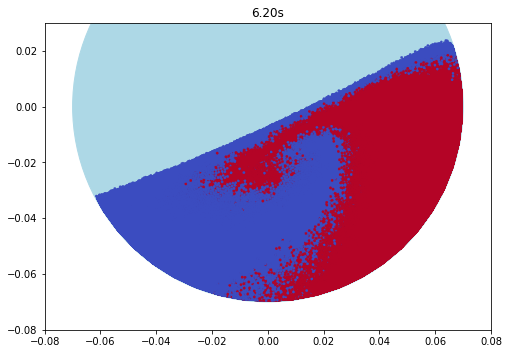

0.3737180203542142


<Figure size 432x288 with 0 Axes>

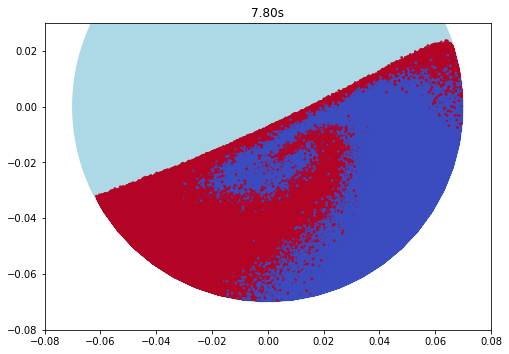

0.45943137702947173


<Figure size 432x288 with 0 Axes>

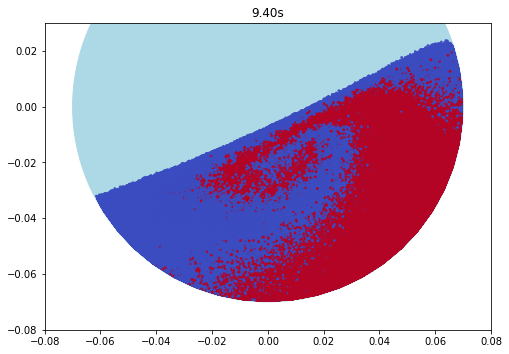

0.5337512632846718


<Figure size 432x288 with 0 Axes>

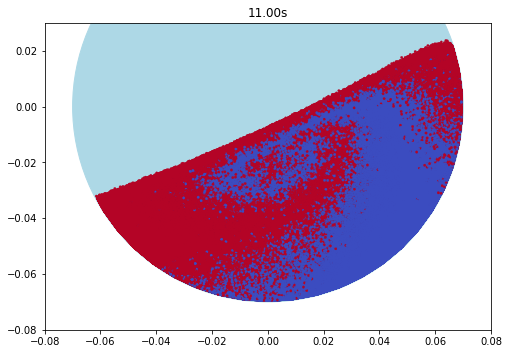

0.6035631252670107


<Figure size 432x288 with 0 Axes>

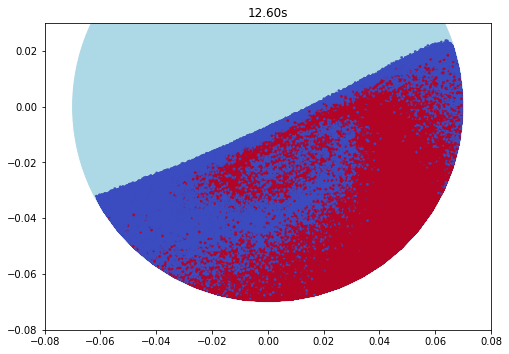

0.6783016350563614


<Figure size 432x288 with 0 Axes>

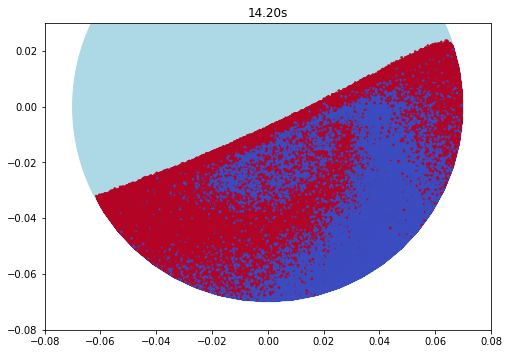

0.7466361276297778


<Figure size 432x288 with 0 Axes>

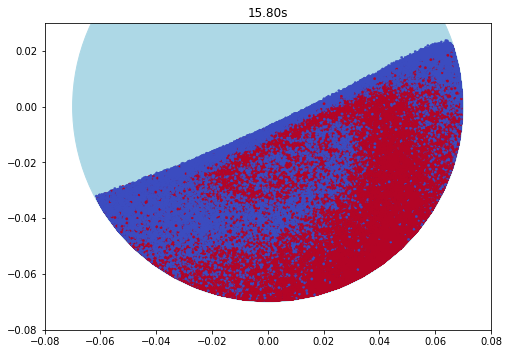

0.7964358606271872


<Figure size 432x288 with 0 Axes>

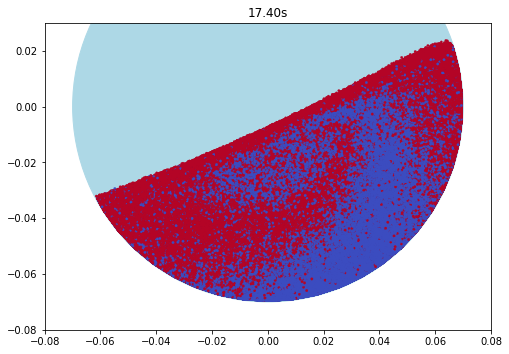

0.8396491406900691


<Figure size 432x288 with 0 Axes>

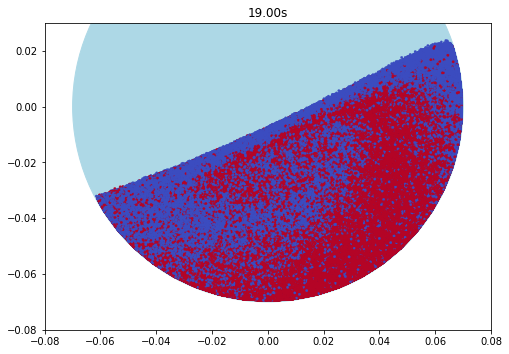

0.8679826513411724


<Figure size 432x288 with 0 Axes>

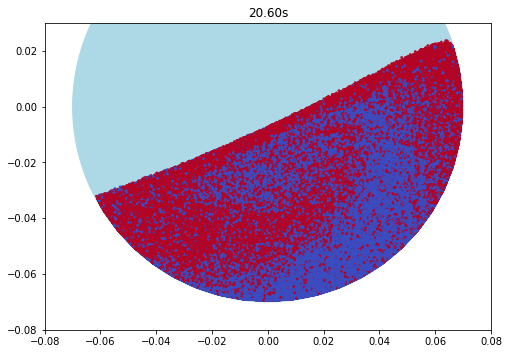

0.8970516800054185


<Figure size 432x288 with 0 Axes>

In [49]:
b_coords, div_size = lacey.grid()
cut_off = 0.001
pos_dict_split = import_dict(id_dict_path, "8y_split_dict")
predicted_old = t2_data

init_time = 4.6
delta_t =  1.6
end_time = 20
extrap_iterations = int((end_time - init_time)/delta_t)+1

extrapolated_lacey = []
extrapolated_time = []


for i in range(extrap_iterations):
    time_i = init_time+(i+1)*delta_t
    extrapolated_time.append(time_i)
    
    plot_filename = rf"{plots_path}\8y_3_4.6\{time_i:.2f}.png"
    predicted_new = plot_particles(extrap.extrapolate_particles(predicted_old, pos_dict_split), id_dict, 1, time_i, plot_path=plot_filename)
    mass_1, mass_2, conc = lacey.bining(b_coords, div_size, predicted_new, cut_off)

    Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(predicted_new))
    extrapolated_lacey.append(Lacey_index)
    print(Lacey_index)

    predicted_old = predicted_new

In [50]:
np.savetxt(rf"{plots_path}\8y_3_4.6\_lacey.csv", np.column_stack((extrapolated_time, extrapolated_lacey)), delimiter=",")

In [38]:
test_time = 4.6
test_index = extrap.find_nearest(extrap.deck.timestepValues, test_time)

test_data = plot_particles(extrap.extrapolate_particles(extrap.get_particle_coords(test_index),pos_dict_split), id_dict, 0, 0)
mass_1, mass_2, conc = lacey.bining(b_coords, div_size, test_data, cut_off)

Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(test_data))
print(Lacey_index)

0.3737180203542142


In [33]:
predicted_old[:5]

array([[-1.21048497e-02, -2.45020925e-02, -3.13186359e-02,
         1.30899694e-06,  3.60068000e+05,  1.00000000e+00],
       [ 3.40284626e-02, -1.69660107e-02, -2.35057165e-02,
         1.30899694e-06,  2.44665000e+05,  1.00000000e+00],
       [-5.56708585e-03, -2.14842509e-02, -4.29125394e-02,
         1.30899694e-06,  1.63589000e+05,  1.00000000e+00],
       [ 1.33095268e-02, -1.97370594e-02, -2.43627948e-02,
         1.30899694e-06,  2.33228000e+05,  0.00000000e+00],
       [-2.16198705e-02, -2.38737952e-02, -3.20452163e-02,
         1.30899694e-06,  1.28601000e+05,  1.00000000e+00]])

In [ ]:
np.where(t2_data[:,:3]==list(pos_dict_split)[0])

(array([1054, 1054, 1054], dtype=int64), array([0, 1, 2], dtype=int64))